In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA



In [2]:
df = pd.read_csv('/Users/cp/Documents/dsi/capstone2/capstone2/data/METABRIC_RNA_Mutation.csv')

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(1904, 693)

In [5]:
df.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)

In [6]:
df.type_of_breast_surgery.value_counts()

MASTECTOMY           1127
BREAST CONSERVING     755
Name: type_of_breast_surgery, dtype: int64

In [7]:
df.cancer_type.value_counts()

Breast Cancer     1903
Breast Sarcoma       1
Name: cancer_type, dtype: int64

In [8]:
df.cancer_type_detailed.value_counts()

Breast Invasive Ductal Carcinoma             1500
Breast Mixed Ductal and Lobular Carcinoma     207
Breast Invasive Lobular Carcinoma             142
Breast Invasive Mixed Mucinous Carcinoma       22
Breast                                         17
Metaplastic Breast Cancer                       1
Name: cancer_type_detailed, dtype: int64

In [9]:
df.cellularity.value_counts()

High        939
Moderate    711
Low         200
Name: cellularity, dtype: int64

In [10]:
df.cellularity.isna().sum()

54

In [11]:
df.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


In [13]:
df1 = df.copy()

In [14]:
df1.shape

(1904, 693)

In [15]:
df_mutants = df1.loc[:,'pik3ca_mut':]
df_mutants.shape

(1904, 173)

In [16]:
rna_express_df = df1.loc[:,:'ugt2b7']
rna_express_df.shape

(1904, 520)

In [17]:
df_mutants.pik3ca_mut.value_counts()

0                     1109
H1047R                 285
E545K                  127
E542K                   72
N345K                   42
                      ... 
E545D                    1
H1047R P471L R108H       1
M1043V E726K             1
H1047R E80K              1
E542K N345K              1
Name: pik3ca_mut, Length: 160, dtype: int64

In [18]:
# df[(df_mutants !=0).sum(1).sum()

In [19]:
np.count_nonzero(df_mutants['pik3ca_mut'])

1904

In [20]:
len(df_mutants['pik3ca_mut'] !=0)

1904

In [21]:
df_mutants = df_mutants.replace('0', 0)

In [22]:
type(df_mutants['pik3ca_mut'][0])

int

In [23]:
df_mutants['death_from_cancer'] = df1['death_from_cancer']

In [24]:
df_mutants.death_from_cancer.value_counts()

Living                  801
Died of Disease         622
Died of Other Causes    480
Name: death_from_cancer, dtype: int64

In [25]:
death_from_dict = {
    'Living':0
    ,'Died of Other Causes':0
    ,'Died of Disease':1
}
df_mutants.replace(death_from_dict, inplace =True)
# df_mutants = df_mutants.death_from_cancer.replace('Living', 0)
# df_mutants.death_from_cancer.replace('Died of Other Causes', 0)
# df_mutants.death_from_cancer.replace('Died of Disease', 1)

In [26]:
df_mutants

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut,death_from_cancer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,H178P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,E542K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,E542K,0,0,0,0,0,0,R1482*,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1900,0,M237I,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1902,0,0,0,V3102M,0,0,S404Kfs*104 L94Pfs*117,0,R5779C,P232L,...,0,0,0,0,0,0,0,0,0,0.0


In [27]:
df_mutants.muc16_mut.value_counts()

0                1578
L7102F              5
T7149A              4
M6048T              3
D4992G              3
                 ... 
F2892S              1
T5787I              1
T4494I              1
M5859I              1
S5929F I6629M       1
Name: muc16_mut, Length: 298, dtype: int64

In [28]:
filt = [df_mutants['death_from_cancer']==1.0]
# df_mutants.loc[filt, :]
# df_mutants.loc[filt]
df_mutants_cancer_death = df_mutants.loc[df_mutants['death_from_cancer']==1]
df_mutants_cancer_death

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut,death_from_cancer
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
5,H1047R,P67Qfs*56,0,0,0,0,A318T,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
9,H1047R,0,0,0,M1974Ifs*32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
10,0,0,P6040R,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,W11C,R273H,0,P5615L,0,A1216G,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1896,0,0,A10542V,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1898,0,X331_splice,0,G746C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1900,0,M237I,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [29]:
def column_mutant_value_counts(df):
    for col in df.columns:
        print(f'name: {col} \n{df[col].value_counts()}')
    

In [30]:
column_mutant_value_counts(df_mutants_cancer_death)

name: pik3ca_mut 
0               358
H1047R           93
E545K            41
E542K            22
N345K            16
               ... 
Q546H             1
R115L             1
L113del           1
H1047R K111N      1
K724del           1
Name: pik3ca_mut, Length: 71, dtype: int64
name: tp53_mut 
0             342
R175H          10
R248W           8
R273H           7
R213*           7
             ... 
R158Pfs*12      1
T155Pfs*23      1
L194P           1
N268Lfs*75      1
K291*           1
Name: tp53_mut, Length: 189, dtype: int64
name: muc16_mut 
0                 502
T7149A              2
L7102F              2
S10189del           2
D902A               2
                 ... 
T3567S              1
P113S T7510S        1
P5555L              1
T4052S P11017T      1
S656T               1
Name: muc16_mut, Length: 115, dtype: int64
name: ahnak2_mut 
0                       525
V2061L                    3
D2099Y                    2
S1341C                    2
G4309R                    1
   

Name: ptprm_mut, dtype: int64
name: foxo3_mut 
0             613
P112S           1
D490E           1
N159Tfs*7       1
D340A           1
Q130*           1
E23K            1
W186Cfs*10      1
A98T            1
S173F           1
Name: foxo3_mut, dtype: int64
name: usp28_mut 
0             607
D969Y           2
D60H            1
N384S           1
R938W           1
Y717F           1
E410Vfs*40      1
A83S            1
Q35R            1
D158H           1
V63L            1
K420*           1
F232S           1
Q219*           1
L872V           1
Name: usp28_mut, dtype: int64
name: gldc_mut 
0              608
S951Y            3
G771E            1
R941T I710F      1
V233A            1
A64T             1
L120V            1
Y858S            1
T269M            1
L716H            1
I834T            1
I989T            1
E909D            1
Name: gldc_mut, dtype: int64
name: brca2_mut 
0                               608
K1875N                            1
F506L                             1
L2654Ffs*

Name: sgcd_mut, dtype: int64
name: spaca1_mut 
0       621
A42S      1
Name: spaca1_mut, dtype: int64
name: rasgef1b_mut 
0        621
V418A      1
Name: rasgef1b_mut, dtype: int64
name: hist1h2bc_mut 
0       620
A18T      2
Name: hist1h2bc_mut, dtype: int64
name: nr2f1_mut 
0        620
R225C      1
D91E       1
Name: nr2f1_mut, dtype: int64
name: klrg1_mut 
0        621
C176Y      1
Name: klrg1_mut, dtype: int64
name: mbl2_mut 
0       621
A17S      1
Name: mbl2_mut, dtype: int64
name: mtap_mut 
0        621
A213S      1
Name: mtap_mut, dtype: int64
name: ppp2cb_mut 
0        620
I224S      1
R110C      1
Name: ppp2cb_mut, dtype: int64
name: smarcd1_mut 
0        620
L434M      1
M366T      1
Name: smarcd1_mut, dtype: int64
name: nras_mut 
0       621
G12S      1
Name: nras_mut, dtype: int64
name: ndfip1_mut 
0             620
X51_splice      1
N68S            1
Name: ndfip1_mut, dtype: int64
name: hras_mut 
0       621
Q61R      1
Name: hras_mut, dtype: int64
name: prps2_mut 
0    

In [31]:
df_mutants_cancer_death.pik3ca_mut.value_counts()

0               358
H1047R           93
E545K            41
E542K            22
N345K            16
               ... 
Q546H             1
R115L             1
L113del           1
H1047R K111N      1
K724del           1
Name: pik3ca_mut, Length: 71, dtype: int64

In [32]:
df_mutants_cancer_death['kmt2d_mut']==0

2        True
4        True
5        True
9        True
10       True
        ...  
1895     True
1896     True
1898     True
1900    False
1901     True
Name: kmt2d_mut, Length: 622, dtype: bool

In [33]:
df_mutants_cancer_death[df_mutants_cancer_death['kmt2d_mut']==0]


,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut,death_from_cancer
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
5,H1047R,P67Qfs*56,0,0,0,0,A318T,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
9,H1047R,0,0,0,M1974Ifs*32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
10,0,0,P6040R,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1895,W11C,R273H,0,P5615L,0,A1216G,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1896,0,0,A10542V,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1898,0,X331_splice,0,G746C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [34]:
df_mutants_cancer_death.shape

(622, 174)

In [35]:
len(df_mutants_cancer_death['kmt2d_mut'].value_counts())

50

In [36]:
def column_print(df):
    for col in df.columns:
        print(f'name: {col}')

In [37]:
column_print(df)

name: patient_id
name: age_at_diagnosis
name: type_of_breast_surgery
name: cancer_type
name: cancer_type_detailed
name: cellularity
name: chemotherapy
name: pam50_+_claudin-low_subtype
name: cohort
name: er_status_measured_by_ihc
name: er_status
name: neoplasm_histologic_grade
name: her2_status_measured_by_snp6
name: her2_status
name: tumor_other_histologic_subtype
name: hormone_therapy
name: inferred_menopausal_state
name: integrative_cluster
name: primary_tumor_laterality
name: lymph_nodes_examined_positive
name: mutation_count
name: nottingham_prognostic_index
name: oncotree_code
name: overall_survival_months
name: overall_survival
name: pr_status
name: radio_therapy
name: 3-gene_classifier_subtype
name: tumor_size
name: tumor_stage
name: death_from_cancer
name: brca1
name: brca2
name: palb2
name: pten
name: tp53
name: atm
name: cdh1
name: chek2
name: nbn
name: nf1
name: stk11
name: bard1
name: mlh1
name: msh2
name: msh6
name: pms2
name: epcam
name: rad51c
name: rad51d
name: rad50
n

In [38]:
df.overall_survival_months.describe()

count    1904.000000
mean      125.121324
std        76.334148
min         0.000000
25%        60.825000
50%       115.616667
75%       184.716667
max       355.200000
Name: overall_survival_months, dtype: float64

In [39]:
df.overall_survival_months.value_counts()

192.200000    4
150.600000    3
128.366667    3
152.066667    3
19.733333     3
             ..
89.900000     1
49.300000     1
91.100000     1
80.833333     1
252.300000    1
Name: overall_survival_months, Length: 1685, dtype: int64

<AxesSubplot:>

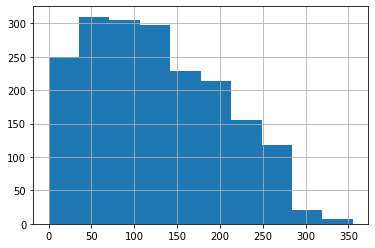

In [40]:
df1.overall_survival_months.hist()

In [41]:
df1.age_at_diagnosis.describe()

count    1904.000000
mean       61.087054
std        12.978711
min        21.930000
25%        51.375000
50%        61.770000
75%        70.592500
max        96.290000
Name: age_at_diagnosis, dtype: float64

<AxesSubplot:>

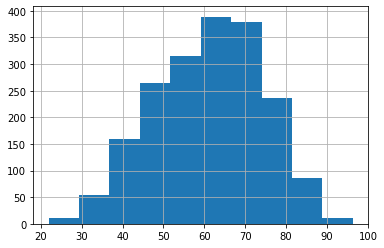

In [42]:
df1.age_at_diagnosis.hist()

In [43]:
rna_expression_df = df.loc[:,'brca1':'ugt2b7']

In [44]:
rna_expression_df

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0.1563,0.5543,-0.6149,0.4572,1.3822,-0.0537,-0.1323,0.2837,-0.0726,-0.5500,...,0.7859,1.5304,1.1196,0.8116,0.0958,-1.2644,-0.3566,-0.2615,-0.6371,-0.5540
1900,0.1343,0.9128,1.3017,0.7383,0.1841,0.0028,0.1243,2.2040,-0.6190,-0.8681,...,-0.5294,-0.6610,-0.1610,0.2251,0.5127,-0.3412,-1.0703,-0.6950,0.0641,-0.8863
1901,1.8107,-0.2608,0.4006,-0.2985,0.0356,-0.1620,1.5486,1.5309,-1.3653,-0.2529,...,-0.1457,-0.5194,2.3968,0.5917,-0.8643,-1.3541,-1.8076,-0.1840,0.0967,-0.6264
1902,-1.2746,-1.7695,-0.3454,-0.3850,0.6689,1.4531,1.0956,-0.0948,-0.6188,-1.9467,...,-0.6380,-1.5275,1.1070,0.2194,1.4317,-0.6985,-0.6046,-0.4915,-0.2847,-0.8041


In [45]:
df1['tumor_stage'].isnull().count()

1904

In [46]:
percent = (df1['tumor_stage'].isnull().sum() / df1['tumor_stage'].isnull().count()).sort_values(ascending=False)

AttributeError: 'numpy.float64' object has no attribute 'sort_values'

In [47]:
def column_type_print(df):
    for col in df.columns:
        print(f'name: {col}  {type(col)}')

In [48]:
column_type_print(df
                 )

name: patient_id  <class 'str'>
name: age_at_diagnosis  <class 'str'>
name: type_of_breast_surgery  <class 'str'>
name: cancer_type  <class 'str'>
name: cancer_type_detailed  <class 'str'>
name: cellularity  <class 'str'>
name: chemotherapy  <class 'str'>
name: pam50_+_claudin-low_subtype  <class 'str'>
name: cohort  <class 'str'>
name: er_status_measured_by_ihc  <class 'str'>
name: er_status  <class 'str'>
name: neoplasm_histologic_grade  <class 'str'>
name: her2_status_measured_by_snp6  <class 'str'>
name: her2_status  <class 'str'>
name: tumor_other_histologic_subtype  <class 'str'>
name: hormone_therapy  <class 'str'>
name: inferred_menopausal_state  <class 'str'>
name: integrative_cluster  <class 'str'>
name: primary_tumor_laterality  <class 'str'>
name: lymph_nodes_examined_positive  <class 'str'>
name: mutation_count  <class 'str'>
name: nottingham_prognostic_index  <class 'str'>
name: oncotree_code  <class 'str'>
name: overall_survival_months  <class 'str'>
name: overall_surviv

In [49]:
df.shape

(1904, 693)

In [50]:
def column_print(df):
    for col in df.columns:
        print(f'name: {col}')

In [51]:
def make_column_lst_to_convert(df):
    lst = []
    for idx, i in enumerate(df.columns):
        if i not in []

SyntaxError: invalid syntax (<ipython-input-51-49d93be8311d>, line 4)

In [52]:
def mutant_list_maker(df):
    lst = []
    for col in df.columns:
        if '_mut' in col:
            lst.append(col)
    return lst


In [53]:
lst_mutants =mutant_list_maker(df)

In [54]:
lst_mutants

['pik3ca_mut',
 'tp53_mut',
 'muc16_mut',
 'ahnak2_mut',
 'kmt2c_mut',
 'syne1_mut',
 'gata3_mut',
 'map3k1_mut',
 'ahnak_mut',
 'dnah11_mut',
 'cdh1_mut',
 'dnah2_mut',
 'kmt2d_mut',
 'ush2a_mut',
 'ryr2_mut',
 'dnah5_mut',
 'herc2_mut',
 'pde4dip_mut',
 'akap9_mut',
 'tg_mut',
 'birc6_mut',
 'utrn_mut',
 'tbx3_mut',
 'col6a3_mut',
 'arid1a_mut',
 'lama2_mut',
 'notch1_mut',
 'cbfb_mut',
 'ncor2_mut',
 'col12a1_mut',
 'col22a1_mut',
 'pten_mut',
 'akt1_mut',
 'atr_mut',
 'thada_mut',
 'ncor1_mut',
 'stab2_mut',
 'myh9_mut',
 'runx1_mut',
 'nf1_mut',
 'map2k4_mut',
 'ros1_mut',
 'lamb3_mut',
 'arid1b_mut',
 'erbb2_mut',
 'sf3b1_mut',
 'shank2_mut',
 'ep300_mut',
 'ptprd_mut',
 'usp9x_mut',
 'setd2_mut',
 'setd1a_mut',
 'thsd7a_mut',
 'afdn_mut',
 'erbb3_mut',
 'rb1_mut',
 'myo1a_mut',
 'alk_mut',
 'fanca_mut',
 'adgra2_mut',
 'ubr5_mut',
 'pik3r1_mut',
 'myo3a_mut',
 'asxl2_mut',
 'apc_mut',
 'ctcf_mut',
 'asxl1_mut',
 'fancd2_mut',
 'taf1_mut',
 'kdm6a_mut',
 'ctnna3_mut',
 'brca1_mut

In [55]:
lst_non_number = ['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'pam50_+_claudin-low_subtype', 'er_status_measured_by_ihc', 
'er_status', 'her2_status_measured_by_snp6', 'her2_status','tumor_other_histologic_subtype', 'inferred_menopausal_state', 'integrative_cluster','primary_tumor_laterality', 
'oncotree_code', 'pr_status', '3-gene_classifier_subtype', 'death_from_cancer']

In [56]:
lst_total_number = lst_non_number +lst_mutants

In [57]:
lst_total_number

['type_of_breast_surgery',
 'cancer_type',
 'cancer_type_detailed',
 'cellularity',
 'pam50_+_claudin-low_subtype',
 'er_status_measured_by_ihc',
 'er_status',
 'her2_status_measured_by_snp6',
 'her2_status',
 'tumor_other_histologic_subtype',
 'inferred_menopausal_state',
 'integrative_cluster',
 'primary_tumor_laterality',
 'oncotree_code',
 'pr_status',
 '3-gene_classifier_subtype',
 'death_from_cancer',
 'pik3ca_mut',
 'tp53_mut',
 'muc16_mut',
 'ahnak2_mut',
 'kmt2c_mut',
 'syne1_mut',
 'gata3_mut',
 'map3k1_mut',
 'ahnak_mut',
 'dnah11_mut',
 'cdh1_mut',
 'dnah2_mut',
 'kmt2d_mut',
 'ush2a_mut',
 'ryr2_mut',
 'dnah5_mut',
 'herc2_mut',
 'pde4dip_mut',
 'akap9_mut',
 'tg_mut',
 'birc6_mut',
 'utrn_mut',
 'tbx3_mut',
 'col6a3_mut',
 'arid1a_mut',
 'lama2_mut',
 'notch1_mut',
 'cbfb_mut',
 'ncor2_mut',
 'col12a1_mut',
 'col22a1_mut',
 'pten_mut',
 'akt1_mut',
 'atr_mut',
 'thada_mut',
 'ncor1_mut',
 'stab2_mut',
 'myh9_mut',
 'runx1_mut',
 'nf1_mut',
 'map2k4_mut',
 'ros1_mut',
 'la

In [58]:
def change_cols_to_floats(dataframe,lst):
    
    for i in lst:
#         dataframe[i] = dataframe[i].str.replace(',', '')
        dataframe[i] = dataframe[i].astype(float)
    return dataframe

In [59]:
def make_number_cols(df, lst):
    lst_non_number = ['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'pam50_+_claudin-low_subtype', 'er_status_measured_by_ihc', 
'er_status', 'her2_status_measured_by_snp6', 'her2_status','tumor_other_histologic_subtype', 'inferred_menopausal_state', 'integrative_cluster','primary_tumor_laterality', 
'oncotree_code', 'pr_status', '3-gene_classifier_subtype', 'death_from_cancer']
    lst_mutants =mutant_list_maker(df)
    lst_total_number = lst_non_number +lst_mutants
    lst = []
    lst_total_number
    for col in df.columns:
        if col not in lst_total_number:
            lst.append(col)

    return lst
# df_float= change_cols_to_floats(df,lst_total_number)

In [60]:
float_cols = make_number_cols(df, lst_total_number)

In [61]:
float_cols

['patient_id',
 'age_at_diagnosis',
 'chemotherapy',
 'cohort',
 'neoplasm_histologic_grade',
 'hormone_therapy',
 'lymph_nodes_examined_positive',
 'mutation_count',
 'nottingham_prognostic_index',
 'overall_survival_months',
 'overall_survival',
 'radio_therapy',
 'tumor_size',
 'tumor_stage',
 'brca1',
 'brca2',
 'palb2',
 'pten',
 'tp53',
 'atm',
 'cdh1',
 'chek2',
 'nbn',
 'nf1',
 'stk11',
 'bard1',
 'mlh1',
 'msh2',
 'msh6',
 'pms2',
 'epcam',
 'rad51c',
 'rad51d',
 'rad50',
 'rb1',
 'rbl1',
 'rbl2',
 'ccna1',
 'ccnb1',
 'cdk1',
 'ccne1',
 'cdk2',
 'cdc25a',
 'ccnd1',
 'cdk4',
 'cdk6',
 'ccnd2',
 'cdkn2a',
 'cdkn2b',
 'myc',
 'cdkn1a',
 'cdkn1b',
 'e2f1',
 'e2f2',
 'e2f3',
 'e2f4',
 'e2f5',
 'e2f6',
 'e2f7',
 'e2f8',
 'src',
 'jak1',
 'jak2',
 'stat1',
 'stat2',
 'stat3',
 'stat5a',
 'stat5b',
 'mdm2',
 'tp53bp1',
 'adam10',
 'adam17',
 'aph1a',
 'aph1b',
 'arrdc1',
 'cir1',
 'ctbp1',
 'ctbp2',
 'cul1',
 'dll1',
 'dll3',
 'dll4',
 'dtx1',
 'dtx2',
 'dtx3',
 'dtx4',
 'ep300',
 'fb

In [62]:
df_float= change_cols_to_floats(df,float_cols)

In [63]:
type(df_float['rdh5'][0])

numpy.float64

In [64]:
df_float.shape

(1904, 693)

In [65]:
df_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(503), object(190)
memory usage: 10.1+ MB


In [66]:
df_float.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)

In [67]:
df_float['type_of_breast_surgery'].value_counts()

MASTECTOMY           1127
BREAST CONSERVING     755
Name: type_of_breast_surgery, dtype: int64

In [68]:
# df['Hour Number'] = df_total['Hour Number'].replace(24, 0)
# df['Hour Number'] = df_total['Hour Number'].replace(25, 0)
def convert_surgury(df):
    surgury_dct = {
        'MASTECTOMY':1
        ,'BREAST CONSERVING':0
    }
    df['type_of_breast_surgery'].replace(surgury_dct, inplace = True)
    return df

In [69]:
df_float1 = convert_surgury(df_float)

In [70]:
df_float1.shape

(1904, 693)

In [71]:
df_float1['pam50_+_claudin-low_subtype'].value_counts()

LumA           679
LumB           461
Her2           220
Basal          199
claudin-low    199
Normal         140
NC               6
Name: pam50_+_claudin-low_subtype, dtype: int64

In [72]:
df_float1.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0.0,75.65,1.0,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0.0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2.0,43.19,0.0,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0.0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5.0,48.87,1.0,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1.0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6.0,47.68,1.0,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1.0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8.0,76.97,1.0,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1.0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df_float1.cancer_type.value_counts()

Breast Cancer     1903
Breast Sarcoma       1
Name: cancer_type, dtype: int64

In [74]:
df_float1.cancer_type_detailed.value_counts()

Breast Invasive Ductal Carcinoma             1500
Breast Mixed Ductal and Lobular Carcinoma     207
Breast Invasive Lobular Carcinoma             142
Breast Invasive Mixed Mucinous Carcinoma       22
Breast                                         17
Metaplastic Breast Cancer                       1
Name: cancer_type_detailed, dtype: int64

In [75]:
for col in df_float1:
    print(f'{col}: \n {df_float1[col].value_counts()}')

patient_id: 
 7163.0    1
642.0     1
637.0     1
654.0     1
578.0     1
         ..
7189.0    1
6211.0    1
4213.0    1
525.0     1
0.0       1
Name: patient_id, Length: 1904, dtype: int64
age_at_diagnosis: 
 49.61    5
61.16    4
64.01    4
43.08    3
60.62    3
        ..
45.40    1
61.27    1
41.14    1
53.03    1
80.50    1
Name: age_at_diagnosis, Length: 1572, dtype: int64
type_of_breast_surgery: 
 1.0    1127
0.0     755
Name: type_of_breast_surgery, dtype: int64
cancer_type: 
 Breast Cancer     1903
Breast Sarcoma       1
Name: cancer_type, dtype: int64
cancer_type_detailed: 
 Breast Invasive Ductal Carcinoma             1500
Breast Mixed Ductal and Lobular Carcinoma     207
Breast Invasive Lobular Carcinoma             142
Breast Invasive Mixed Mucinous Carcinoma       22
Breast                                         17
Metaplastic Breast Cancer                       1
Name: cancer_type_detailed, dtype: int64
cellularity: 
 High        939
Moderate    711
Low         200
Nam

e2f3: 
 -0.0271    3
-1.0352    2
-0.4247    2
 0.6621    2
-0.0225    2
          ..
-1.0522    1
-0.8413    1
 2.1762    1
 2.2135    1
-1.6250    1
Name: e2f3, Length: 1857, dtype: int64
e2f4: 
  0.4428    4
 0.3602    3
 0.9247    3
 1.1341    3
-0.5811    3
          ..
-1.1898    1
-1.5960    1
-0.8144    1
-1.0998    1
 0.1875    1
Name: e2f4, Length: 1700, dtype: int64
e2f5: 
  0.4168    3
-0.6370    3
-0.7703    3
 0.7426    3
-0.0733    3
          ..
-1.5191    1
 0.1105    1
-1.0855    1
-0.7843    1
 0.3125    1
Name: e2f5, Length: 1782, dtype: int64
e2f6: 
 -0.8491    3
 0.4549    3
-1.5542    2
 0.5324    2
-0.9546    2
          ..
 0.9323    1
-0.2805    1
-0.1806    1
 0.7776    1
-0.2500    1
Name: e2f6, Length: 1845, dtype: int64
e2f7: 
 -0.2325    4
 1.3218    3
 0.5460    3
-0.7394    2
-0.4613    2
          ..
 1.9588    1
-0.6247    1
-0.6220    1
 0.2943    1
-0.6250    1
Name: e2f7, Length: 1824, dtype: int64
e2f8: 
  0.2144    3
-0.1166    3
-1.6785    3
 0.

hes4: 
  0.1787    6
 0.1439    5
 1.0926    4
 0.6401    4
 1.5668    4
          ..
-1.8809    1
-0.6189    1
 0.4282    1
-0.4910    1
-0.1250    1
Name: hes4, Length: 1548, dtype: int64
hes7: 
 -1.1926    13
-1.9479    13
-1.8125     9
-1.4232     9
-2.1517     8
           ..
 3.0550     1
-0.1450     1
 0.3296     1
 0.7314     1
 1.0297     1
Name: hes7, Length: 1511, dtype: int64
hey1: 
  0.1650    4
 0.2174    3
 0.0334    3
 0.6099    3
-0.4619    3
          ..
 0.2629    1
 1.1401    1
 0.8059    1
-0.6382    1
 0.8125    1
Name: hey1, Length: 1756, dtype: int64
hey2: 
 -0.9086    3
-0.1188    3
-0.4508    3
-0.0855    3
-0.2863    3
          ..
-0.7849    1
-0.7151    1
-0.3807    1
-0.6993    1
 1.0586    1
Name: hey2, Length: 1789, dtype: int64
acvr1: 
 -0.1663    4
-0.4207    4
 0.0487    4
 0.1186    4
 0.2020    3
          ..
-0.3157    1
 0.2145    1
 0.4646    1
-0.0630    1
-1.1875    1
Name: acvr1, Length: 1670, dtype: int64
acvr1b: 
  0.4826    5
 0.7706    5
 

foxo3: 
  0.7552    3
-0.2779    3
-0.8889    2
-0.1277    2
 0.4539    2
          ..
 0.8668    1
-1.6360    1
 0.9205    1
 1.3852    1
 0.8750    1
Name: foxo3, Length: 1857, dtype: int64
gdf11: 
 -0.5138    4
-0.2090    4
-0.4115    3
-0.2271    3
-0.4800    3
          ..
 0.1415    1
-1.1337    1
-1.0377    1
-0.0267    1
 0.2500    1
Name: gdf11, Length: 1762, dtype: int64
gdf2: 
 -0.5110    3
-1.6721    3
 0.2599    3
-1.5095    3
 0.3314    3
          ..
 0.4811    1
-0.6593    1
-0.2258    1
-0.0897    1
 0.3125    1
Name: gdf2, Length: 1803, dtype: int64
gsk3b: 
  0.0346    4
-0.5464    4
-0.3238    3
-0.8071    3
 0.6084    3
          ..
 0.5290    1
 1.3919    1
-1.5143    1
-0.1415    1
 0.6875    1
Name: gsk3b, Length: 1728, dtype: int64
hif1a: 
 -0.3132    3
 0.4707    3
-0.3134    2
-0.5316    2
-0.9595    2
          ..
-1.1969    1
 0.0056    1
 0.5957    1
-0.3136    1
-0.1875    1
Name: hif1a, Length: 1850, dtype: int64
hla-g: 
 -0.1689    4
-0.4973    3
-0.2074

mmp9: 
  1.5245    5
 1.9192    4
-0.2735    3
 0.8646    3
 0.7283    3
          ..
-0.2340    1
-1.4639    1
 1.6611    1
 0.6042    1
-0.7500    1
Name: mmp9, Length: 1735, dtype: int64
mtor: 
  0.1025    5
 0.0904    5
 0.6340    4
 0.4286    4
-0.6843    4
          ..
 0.8256    1
-0.9079    1
 0.1819    1
-0.2059    1
-0.2792    1
Name: mtor, Length: 1623, dtype: int64
nfkb1: 
  0.3893    8
-0.0448    7
 0.5111    6
 0.3817    6
-0.0627    6
          ..
-1.7421    1
-1.2202    1
-0.2990    1
-0.3096    1
 0.5000    1
Name: nfkb1, Length: 1338, dtype: int64
nfkb2: 
 -0.1036    4
-0.4355    3
 0.6017    3
-0.2008    3
-0.3048    3
          ..
-1.2511    1
-0.4537    1
 0.4312    1
-0.9410    1
-0.8870    1
Name: nfkb2, Length: 1752, dtype: int64
opcml: 
 -0.0783    3
-0.2582    3
-0.2100    2
 0.5428    2
-0.5721    2
          ..
-0.2392    1
 0.0539    1
-0.9040    1
 0.3011    1
 0.7500    1
Name: opcml, Length: 1845, dtype: int64
pdgfa: 
 -0.6697    3
-0.8203    2
-0.4323  

ros1: 
 -0.7047    3
-1.3891    3
 0.2250    3
-0.3233    3
 0.3936    3
          ..
 0.2671    1
 1.0435    1
 0.1166    1
 0.0028    1
 0.6875    1
Name: ros1, Length: 1804, dtype: int64
runx1: 
  1.3065    4
 0.4320    4
 0.2449    3
 1.0061    3
-0.2319    3
          ..
 0.5842    1
 0.0725    1
-0.3774    1
-1.4764    1
-0.8125    1
Name: runx1, Length: 1709, dtype: int64
tbx3: 
  0.4563    4
-0.6982    3
 0.4905    3
-0.3982    3
 0.0218    3
          ..
-1.0450    1
-0.7376    1
-0.0116    1
-0.8467    1
-1.3125    1
Name: tbx3, Length: 1802, dtype: int64
abcb1: 
 -0.4968    3
-0.7230    3
-0.8729    3
-0.3544    3
 0.7687    3
          ..
-0.0232    1
 0.0545    1
-0.0892    1
-0.0780    1
-0.1250    1
Name: abcb1, Length: 1812, dtype: int64
abcb11: 
 -0.3757    3
-0.2367    2
 0.1144    2
-0.4199    2
-0.3587    2
          ..
-0.4844    1
-1.3894    1
 0.9928    1
 0.9838    1
 0.5625    1
Name: abcb11, Length: 1846, dtype: int64
abcc1: 
  0.3591    3
 1.0410    3
 0.8731

gh1: 
 -0.5029    3
 0.0365    2
-0.7351    2
-0.5508    2
 0.2231    2
          ..
 0.6634    1
 0.1415    1
 1.3598    1
 0.7842    1
 1.1875    1
Name: gh1, Length: 1854, dtype: int64
gldc: 
 -0.6669    4
-0.5791    4
-0.5596    3
-0.4822    3
-0.6280    3
          ..
-0.3646    1
-0.7564    1
-0.1443    1
-0.4630    1
 0.0625    1
Name: gldc, Length: 1759, dtype: int64
gpr32: 
 -0.4208    3
-0.2002    3
 0.8058    2
 0.1529    2
 0.1669    2
          ..
-0.1166    1
 0.3461    1
-1.4961    1
-0.5957    1
-0.0812    1
Name: gpr32, Length: 1854, dtype: int64
gps2: 
  0.2634    3
-0.0101    3
 0.0676    2
-0.5053    2
-0.3764    2
          ..
 0.7065    1
-2.0417    1
-1.3095    1
 0.2431    1
-2.5625    1
Name: gps2, Length: 1850, dtype: int64
hdac9: 
  0.2183    4
 0.2166    3
 0.3397    3
 0.2202    2
-0.6846    2
          ..
-1.2805    1
 0.1560    1
 0.3390    1
 1.3656    1
 0.0625    1
Name: hdac9, Length: 1817, dtype: int64
herc2: 
 -0.4675    5
 0.3574    4
-0.2234    4


smarcc1: 
 -0.0327    5
 0.0379    4
-0.2012    4
-0.1668    4
-0.0836    3
          ..
-0.1053    1
 0.5037    1
-0.3114    1
-1.1359    1
 0.0000    1
Name: smarcc1, Length: 1635, dtype: int64
smarcc2: 
  0.6552    5
-0.0991    4
 0.5733    4
-0.5057    4
 0.5855    4
          ..
 1.1641    1
 0.3591    1
 1.0636    1
-0.5324    1
-0.7620    1
Name: smarcc2, Length: 1660, dtype: int64
smarcd1: 
  0.6586    5
-0.2325    5
-0.3066    4
-0.2554    4
 0.2004    4
          ..
-0.1644    1
 0.1481    1
 0.3159    1
-2.8037    1
-4.8502    1
Name: smarcd1, Length: 1578, dtype: int64
spaca1: 
  1.1473    3
-0.6664    3
 0.1074    2
 0.5320    2
-0.4340    2
          ..
-0.2564    1
 0.6883    1
-0.6155    1
 0.8703    1
-0.9375    1
Name: spaca1, Length: 1838, dtype: int64
stab2: 
 -0.6456    4
-0.5441    3
 0.8944    3
-0.4168    3
-0.4394    2
          ..
 2.5579    1
-0.8950    1
 0.0388    1
 0.7383    1
-1.6875    1
Name: stab2, Length: 1822, dtype: int64
stmn2: 
 -0.0101    3
-0.3

nrip1: 
  1.3803    4
-0.4745    4
-0.2920    4
 0.1041    3
 1.1700    3
          ..
 0.0986    1
-0.2451    1
-0.9934    1
-2.3673    1
-0.1250    1
Name: nrip1, Length: 1686, dtype: int64
pik3r3: 
 -0.3741    3
-0.1199    3
 0.1889    3
 0.1720    3
-0.1028    3
          ..
-0.7843    1
-0.5613    1
 0.1129    1
-0.1794    1
-0.1250    1
Name: pik3r3, Length: 1780, dtype: int64
prkci: 
  0.2471    3
-2.0373    2
-0.2107    2
-1.2898    2
 0.2671    2
          ..
-0.4061    1
 0.7217    1
-0.9840    1
 1.5605    1
 0.1250    1
Name: prkci, Length: 1849, dtype: int64
prkd1: 
  0.7718    4
-0.0859    3
 1.0665    3
-0.7502    3
 0.3747    2
          ..
 0.4818    1
 0.5633    1
-0.7060    1
-0.9280    1
 0.2500    1
Name: prkd1, Length: 1805, dtype: int64
ran: 
 -0.0119    3
 0.8309    2
-0.0444    2
 0.5288    2
 0.2303    2
          ..
 0.0150    1
 0.0029    1
-0.0412    1
-0.0641    1
-0.3750    1
Name: ran, Length: 1849, dtype: int64
rdh5: 
 -0.6603    3
-0.7423    3
 0.3520 

Name: akt1_mut, dtype: int64
atr_mut: 
 0                 1827
T1469A               3
E1986_P1990del       2
M1996T               2
I1753V               2
                  ... 
I219V                1
M721V                1
S595L                1
M197T                1
Y2622H               1
Name: atr_mut, Length: 73, dtype: int64
thada_mut: 
 0         1827
E1925K       5
R923Q        3
T1085M       3
M1073I       2
          ... 
S381N        1
M1820I       1
D1936V       1
S986T        1
I783M        1
Name: thada_mut, Length: 67, dtype: int64
ncor1_mut: 
 0                          1828
G1168=                        2
V1542M                        2
Q661*                         1
R564Sfs*25                    1
                           ... 
E1346Gfs*14 E1346Kfs*15       1
Q1256H                        1
T1766Vfs*76 R1762Dfs*78       1
S903*                         1
G2291Vfs*8                    1
Name: ncor1_mut, Length: 75, dtype: int64
stab2_mut: 
 0              1829
G2018R 

Name: jak1_mut, dtype: int64
setdb1_mut: 
 0               1876
A1024T             1
G1016E             1
S1124L             1
R1074C             1
L1278H             1
N988S              1
P1192Hfs*127       1
E696*              1
N762D              1
I1037V             1
D607N              1
M791V              1
I1037M             1
E696K              1
P567S              1
N1266S             1
P496S              1
R1194H             1
R1086Q             1
R1048*             1
X527_splice        1
S1081I             1
P672L              1
P950R              1
D1132H             1
R1165Q             1
D1044H             1
F995C              1
Name: setdb1_mut, dtype: int64
fam20c_mut: 
 0        1876
G153D       3
D573N       2
Y539S       2
A26P        1
A398S       1
Q289R       1
R530Q       1
L494V       1
R481T       1
E427K       1
A128S       1
T472M       1
S100T       1
E306K       1
T290M       1
R414H       1
A417=       1
G127S       1
V570L       1
V569M       1
R10G     

Name: ndfip1_mut, dtype: int64
hras_mut: 
 0       1024
0        878
N86T       1
Q61R       1
Name: hras_mut, dtype: int64
prps2_mut: 
 0        1902
G255R       1
I159F       1
Name: prps2_mut, dtype: int64
smarcb1_mut: 
 0        1024
0         878
D159N       1
I28L        1
Name: smarcb1_mut, dtype: int64
stmn2_mut: 
 0        1902
N145K       1
R156H       1
Name: stmn2_mut, dtype: int64
siah1_mut: 
 0        1024
0         879
T249A       1
Name: siah1_mut, dtype: int64


In [76]:
def convert_er_status(df):
    er_status_dct = {
        'Positive':1
        ,'Negative':0
    }
    df['er_status'].replace(er_status_dct, inplace = True)
    return df

In [77]:
def convert_er_status_measured_by_ihc(df):
    convert_er_status_measured_by_ihc_dct = {
        'Positve':1
        ,'Negative':0
    }
    df['er_status_measured_by_ihc'].replace(convert_er_status_measured_by_ihc_dct, inplace = True)
    return df

In [78]:
# def convert_her2_status_measured_by_snp6(df):
#     convert_her2_status_measured_by_snp6_dct = {
#         'Positive':1
#         ,'Negative':0
#     }
#     df['her2_status_measured_by_snp6'].replace(convert_her2_status_measured_by_snp6_dct, inplace = True)
#     return df

In [79]:
# def convert_her2_status_measured_by_snp6(df):
#     convert_her2_status_measured_by_snp6_dct = {
#         'Positive':1
#         ,'Negative':0
#     }
#     df['her2_status_measured_by_snp6'].replace(convert_her2_status_measured_by_snp6_dct, inplace = True)
#     return df

In [80]:
def convert_inferred_menopausal_state(df):
    convert_inferred_menopausal_state_dct = {
        'Post':1
        ,'Pre':0
    }
    df['inferred_menopausal_state'].replace(convert_inferred_menopausal_state_dct, inplace = True)
    return df

# inferred_menopausal_state: 
#  Post    1493
# Pre      411

In [81]:
def convert_primary_tumor_laterality(df):
    convert_primary_tumor_laterality_dct = {
        'Right':1
        ,'Left':0
    }
    df['primary_tumor_laterality'].replace(convert_primary_tumor_laterality_dct, inplace = True)
    return df

# primary_tumor_laterality: 
#  Left     935
# Right    863

In [82]:
def convert_pr_status(df):
    convert_pr_status_dct = {
        'Positive':1
        ,'Negative':0
    }
    df['pr_status'].replace(convert_pr_status_dct, inplace = True)
    return df

# pr_status: 
#  Positive    1009
# Negative     895

In [83]:
df_float2 = convert_er_status(df_float1)
df_float3 = convert_er_status_measured_by_ihc(df_float2)
df_float4 = convert_inferred_menopausal_state(df_float3)
df_float5 = convert_primary_tumor_laterality(df_float4)
df_float6 = convert_pr_status(df_float5)

In [84]:

for col in df_float1:
    if len(df_float1[col].value_counts())==2:
    
        print(f'{col}: \n {df_float1[col].value_counts()}')

type_of_breast_surgery: 
 1.0    1127
0.0     755
Name: type_of_breast_surgery, dtype: int64
cancer_type: 
 Breast Cancer     1903
Breast Sarcoma       1
Name: cancer_type, dtype: int64
chemotherapy: 
 0.0    1508
1.0     396
Name: chemotherapy, dtype: int64
er_status_measured_by_ihc: 
 1.0    1445
0.0     429
Name: er_status_measured_by_ihc, dtype: int64
er_status: 
 1    1459
0     445
Name: er_status, dtype: int64
her2_status: 
 Negative    1668
Positive     236
Name: her2_status, dtype: int64
hormone_therapy: 
 1.0    1174
0.0     730
Name: hormone_therapy, dtype: int64
inferred_menopausal_state: 
 1    1493
0     411
Name: inferred_menopausal_state, dtype: int64
primary_tumor_laterality: 
 0.0    935
1.0    863
Name: primary_tumor_laterality, dtype: int64
overall_survival: 
 0.0    1103
1.0     801
Name: overall_survival, dtype: int64
pr_status: 
 1    1009
0     895
Name: pr_status, dtype: int64
radio_therapy: 
 1.0    1137
0.0     767
Name: radio_therapy, dtype: int64


In [85]:
len(df_float1['her2_status_measured_by_snp6'].value_counts())

4

In [86]:
df_float2['her2_status_measured_by_snp6'].value_counts()

NEUTRAL    1383
GAIN        417
LOSS        100
UNDEF         4
Name: her2_status_measured_by_snp6, dtype: int64

In [87]:
df_float6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(506), int64(3), object(184)
memory usage: 10.1+ MB


In [88]:
df_float6.shape

(1904, 693)

In [89]:
mutant_df = df_float6.loc[:,'pik3ca_mut':]

In [90]:
mutant_df

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,H178P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E542K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,E542K,0,0,0,0,0,0,R1482*,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,M237I,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1902,0,0,0,V3102M,0,0,S404Kfs*104 L94Pfs*117,0,R5779C,P232L,...,0,0,0,0,0,0,0,0,0,0


In [91]:
mutant_columns_lst = df_float6.columns

In [92]:
mutant_columns_lst2 = [] 
for i in mutant_columns_lst:
    mutant_columns_lst2.append(i)
    
    

In [93]:
# non_Mutant_df = df_float6.drop(df_float6.loc[:,'pik3ca_mut':])
# df.drop(['c', 'd'], axis=1)

# df.drop(df.iloc[:, 1:3], inplace = True, axis = 1)
df_float7 = df_float6.copy()

In [94]:
df_float7.drop(df_float7.loc[:, 'pik3ca_mut':], inplace = True, axis = 1)

In [95]:
df_float7.shape

(1904, 520)

In [96]:
mutant_columns_lst2

['patient_id',
 'age_at_diagnosis',
 'type_of_breast_surgery',
 'cancer_type',
 'cancer_type_detailed',
 'cellularity',
 'chemotherapy',
 'pam50_+_claudin-low_subtype',
 'cohort',
 'er_status_measured_by_ihc',
 'er_status',
 'neoplasm_histologic_grade',
 'her2_status_measured_by_snp6',
 'her2_status',
 'tumor_other_histologic_subtype',
 'hormone_therapy',
 'inferred_menopausal_state',
 'integrative_cluster',
 'primary_tumor_laterality',
 'lymph_nodes_examined_positive',
 'mutation_count',
 'nottingham_prognostic_index',
 'oncotree_code',
 'overall_survival_months',
 'overall_survival',
 'pr_status',
 'radio_therapy',
 '3-gene_classifier_subtype',
 'tumor_size',
 'tumor_stage',
 'death_from_cancer',
 'brca1',
 'brca2',
 'palb2',
 'pten',
 'tp53',
 'atm',
 'cdh1',
 'chek2',
 'nbn',
 'nf1',
 'stk11',
 'bard1',
 'mlh1',
 'msh2',
 'msh6',
 'pms2',
 'epcam',
 'rad51c',
 'rad51d',
 'rad50',
 'rb1',
 'rbl1',
 'rbl2',
 'ccna1',
 'ccnb1',
 'cdk1',
 'ccne1',
 'cdk2',
 'cdc25a',
 'ccnd1',
 'cdk4',

In [97]:
df_float6.shape

(1904, 693)

In [98]:
df_float7

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,0.0,75.65,1.0,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0.0,claudin-low,1.0,1.0,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,2.0,43.19,0.0,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0.0,LumA,1.0,1.0,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,5.0,48.87,1.0,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1.0,LumB,1.0,1.0,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,6.0,47.68,1.0,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1.0,LumB,1.0,1.0,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,8.0,76.97,1.0,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1.0,LumB,1.0,1.0,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295.0,43.10,0.0,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0.0,LumA,4.0,1.0,...,0.7859,1.5304,1.1196,0.8116,0.0958,-1.2644,-0.3566,-0.2615,-0.6371,-0.5540
1900,7296.0,42.88,1.0,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0.0,LumB,4.0,1.0,...,-0.5294,-0.6610,-0.1610,0.2251,0.5127,-0.3412,-1.0703,-0.6950,0.0641,-0.8863
1901,7297.0,62.90,1.0,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0.0,LumB,4.0,1.0,...,-0.1457,-0.5194,2.3968,0.5917,-0.8643,-1.3541,-1.8076,-0.1840,0.0967,-0.6264
1902,7298.0,61.16,1.0,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0.0,LumB,4.0,1.0,...,-0.6380,-1.5275,1.1070,0.2194,1.4317,-0.6985,-0.6046,-0.4915,-0.2847,-0.8041


In [99]:
mutant_df

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,H178P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E542K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,E542K,0,0,0,0,0,0,R1482*,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,M237I,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1902,0,0,0,V3102M,0,0,S404Kfs*104 L94Pfs*117,0,R5779C,P232L,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df_float7.er_status_measured_by_ihc

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1899    1.0
1900    1.0
1901    1.0
1902    1.0
1903    1.0
Name: er_status_measured_by_ihc, Length: 1904, dtype: float64

In [101]:
# df_float8 = convert_er_status_measured_by_ihc(df_float7)
df_float8 = df_float7

In [102]:

df_float8['er_status_measured_by_ihc'].value_counts()

1.0    1445
0.0     429
Name: er_status_measured_by_ihc, dtype: int64

In [103]:
df_float8.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'srd5a1', 'srd5a2', 'srd5a3', 'st7', 'star', 'tnk2', 'tulp4', 'ugt2b15',
       'ugt2b17', 'ugt2b7'],
      dtype='object', length=520)

In [104]:
column_print(df_float8)

name: patient_id
name: age_at_diagnosis
name: type_of_breast_surgery
name: cancer_type
name: cancer_type_detailed
name: cellularity
name: chemotherapy
name: pam50_+_claudin-low_subtype
name: cohort
name: er_status_measured_by_ihc
name: er_status
name: neoplasm_histologic_grade
name: her2_status_measured_by_snp6
name: her2_status
name: tumor_other_histologic_subtype
name: hormone_therapy
name: inferred_menopausal_state
name: integrative_cluster
name: primary_tumor_laterality
name: lymph_nodes_examined_positive
name: mutation_count
name: nottingham_prognostic_index
name: oncotree_code
name: overall_survival_months
name: overall_survival
name: pr_status
name: radio_therapy
name: 3-gene_classifier_subtype
name: tumor_size
name: tumor_stage
name: death_from_cancer
name: brca1
name: brca2
name: palb2
name: pten
name: tp53
name: atm
name: cdh1
name: chek2
name: nbn
name: nf1
name: stk11
name: bard1
name: mlh1
name: msh2
name: msh6
name: pms2
name: epcam
name: rad51c
name: rad51d
name: rad50
n

In [105]:
df_float8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 520 entries, patient_id to ugt2b7
dtypes: float64(506), int64(3), object(11)
memory usage: 7.6+ MB


In [106]:
mutant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 173 entries, pik3ca_mut to siah1_mut
dtypes: object(173)
memory usage: 2.5+ MB


In [107]:
df_float8['cancer_type']== 'Breast Sarcoma'

0       False
1       False
2       False
3       False
4       False
        ...  
1899    False
1900    False
1901    False
1902    False
1903    False
Name: cancer_type, Length: 1904, dtype: bool

In [108]:
df_float8[df_float8['cancer_type']== 'Breast Sarcoma']

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
170,284.0,51.42,NaN,Breast Sarcoma,Breast Invasive Ductal Carcinoma,Moderate,0.0,claudin-low,1.0,NaN,...,0.1811,2.8734,-0.375,0.0609,1.1418,-0.2592,-0.8325,-0.7581,-0.9021,-0.7875


In [109]:
df_float8.drop(columns = ['cancer_type', ])
# df.drop(columns =['C', 'D'])
# df_float7.drop(df_float7.loc[:, 'pik3ca_mut':], inplace = True, axis = 1)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,0.0,75.65,1.0,Breast Invasive Ductal Carcinoma,NaN,0.0,claudin-low,1.0,1.0,1,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,2.0,43.19,0.0,Breast Invasive Ductal Carcinoma,High,0.0,LumA,1.0,1.0,1,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,5.0,48.87,1.0,Breast Invasive Ductal Carcinoma,High,1.0,LumB,1.0,1.0,1,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,6.0,47.68,1.0,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1.0,LumB,1.0,1.0,1,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,8.0,76.97,1.0,Breast Mixed Ductal and Lobular Carcinoma,High,1.0,LumB,1.0,1.0,1,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295.0,43.10,0.0,Breast Invasive Lobular Carcinoma,High,0.0,LumA,4.0,1.0,1,...,0.7859,1.5304,1.1196,0.8116,0.0958,-1.2644,-0.3566,-0.2615,-0.6371,-0.5540
1900,7296.0,42.88,1.0,Breast Invasive Ductal Carcinoma,High,0.0,LumB,4.0,1.0,1,...,-0.5294,-0.6610,-0.1610,0.2251,0.5127,-0.3412,-1.0703,-0.6950,0.0641,-0.8863
1901,7297.0,62.90,1.0,Breast Invasive Ductal Carcinoma,High,0.0,LumB,4.0,1.0,1,...,-0.1457,-0.5194,2.3968,0.5917,-0.8643,-1.3541,-1.8076,-0.1840,0.0967,-0.6264
1902,7298.0,61.16,1.0,Breast Invasive Ductal Carcinoma,Moderate,0.0,LumB,4.0,1.0,1,...,-0.6380,-1.5275,1.1070,0.2194,1.4317,-0.6985,-0.6046,-0.4915,-0.2847,-0.8041


In [110]:
mrna_df = df_float8.loc[:,'brca1':'ugt2b7']

In [111]:
mrna_df.shape

(1904, 489)

In [112]:
mrna_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 489 entries, brca1 to ugt2b7
dtypes: float64(489)
memory usage: 7.1 MB


In [113]:
mrna_df['overall_survival_months']= df1['overall_survival_months']

In [114]:
mrna_df['overall_survival_months']

0       140.500000
1        84.633333
2       163.700000
3       164.933333
4        41.366667
           ...    
1899    196.866667
1900     44.733333
1901    175.966667
1902     86.233333
1903    201.900000
Name: overall_survival_months, Length: 1904, dtype: float64

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score



In [116]:
mnra_df2 = mrna_df.copy()

In [117]:
y = mnra_df2.pop('overall_survival_months')

In [118]:
y

0       140.500000
1        84.633333
2       163.700000
3       164.933333
4        41.366667
           ...    
1899    196.866667
1900     44.733333
1901    175.966667
1902     86.233333
1903    201.900000
Name: overall_survival_months, Length: 1904, dtype: float64

In [119]:
X = mnra_df2

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [121]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [122]:
reg.predict(X_test)

array([164.09062649, 126.36724327, 112.47424083,  83.27042364,
       143.24168372, 102.47842009, 175.90208108, 132.49986396,
       131.35181457, 106.02411928,  69.33110185, 128.07925205,
       134.61210171, 117.73071212,  71.70270857, 103.6797321 ,
       128.2398421 , 149.1197562 , 132.6652341 , 126.40243119,
       106.00337624, 107.34562572,  92.84170684, 102.45010847,
       120.29396221, 117.19470939,  58.36831524, 154.31625157,
        95.78425292, 152.02562909, 100.05921931, 124.02535548,
       133.85964838, 118.73235146,  84.09895661, 102.52321637,
       120.1062431 , 112.87990781, 115.04913898, 175.17819528,
       134.44753361, 115.06729302, 128.98650028,  96.82770848,
       123.84519599, 141.35180201,  65.53446363, 133.32277364,
       117.10429264, 133.26186533, 113.1165005 , 106.19992788,
       143.4870315 , 136.00716614, 135.82386558, 109.34326249,
       134.89935924,  98.23955883, 140.08131219,  81.01776291,
       145.88202585, 113.4767104 , 134.01994973, 100.68

In [123]:
reg.score(X_test, y_test)

0.04987166107038665

In [124]:
random_search_dct = {
    'loss':['ls', 'lad', 'huber', 'quantile']
    ,'learning_rate':[0.05, 0.1, 0.2, 0.25]
    , 'n_estimators':[40,120, 200]
    ,'max_depth ':[]
}

In [125]:
clf = RandomizedSearchCV(reg, )

TypeError: __init__() missing 1 required positional argument: 'param_distributions'

In [ ]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt 
parameters = {'learning_rate': sp_randFloat(),
                  'subsample'    : sp_randFloat(),
                  'n_estimators' : sp_randInt(100, 1000),
                  'max_depth'    : sp_randInt(4, 10) 
                 }
    
randm = RandomizedSearchCV(estimator=reg, param_distributions = parameters, 
                           cv = 2, n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train)

# Results from Random Search
print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")    

print("\n The best estimator across ALL searched params:\n",
      randm.best_estimator_)

print("\n The best score across ALL searched params:\n",
      randm.best_score_)

print("\n The best parameters across ALL searched params:\n",
      randm.best_params_)
print("\n ========================================================")

In [ ]:
# mnra_df2.to_csv(r'/Users/cp/Desktop/capstone2.mrn_df2.csv', index = False)

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
rf = RandomForestRegressor()

In [127]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [128]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


In [ ]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 7)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_train, y_train)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

In [ ]:
mrna_df.isnull().values.any()

In [129]:
df.shape


(1904, 693)

In [130]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0.0,75.65,1.0,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0.0,claudin-low,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,43.19,0.0,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0.0,LumA,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,48.87,1.0,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1.0,LumB,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,6.0,47.68,1.0,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1.0,LumB,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,8.0,76.97,1.0,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1.0,LumB,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
df1.death_from_cancer

0                     Living
1                     Living
2            Died of Disease
3                     Living
4            Died of Disease
                ...         
1899                  Living
1900         Died of Disease
1901         Died of Disease
1902    Died of Other Causes
1903    Died of Other Causes
Name: death_from_cancer, Length: 1904, dtype: object

In [134]:
death_from_dict = {
    'Living':0
    ,'Died of Other Causes':0
    ,'Died of Disease':1
}
df1.replace(death_from_dict, inplace =True)


In [135]:
df1.death_from_cancer.fillna(0, inplace = True)

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
1899    0.0
1900    1.0
1901    1.0
1902    0.0
1903    0.0
Name: death_from_cancer, Length: 1904, dtype: float64

In [137]:
filt = [df1['death_from_cancer']==1.0]
# df_mutants.loc[filt, :]
# df_mutants.loc[filt]
df1_death = df_mutants.loc[df_mutants['death_from_cancer']==1]
df1_death

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut,death_from_cancer
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
5,H1047R,P67Qfs*56,0,0,0,0,A318T,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
9,H1047R,0,0,0,M1974Ifs*32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
10,0,0,P6040R,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,W11C,R273H,0,P5615L,0,A1216G,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1896,0,0,A10542V,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1898,0,X331_splice,0,G746C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1900,0,M237I,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [138]:
df1_death.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 2 to 1901
Data columns (total 174 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pik3ca_mut         object 
 1   tp53_mut           object 
 2   muc16_mut          object 
 3   ahnak2_mut         object 
 4   kmt2c_mut          object 
 5   syne1_mut          object 
 6   gata3_mut          object 
 7   map3k1_mut         object 
 8   ahnak_mut          object 
 9   dnah11_mut         object 
 10  cdh1_mut           object 
 11  dnah2_mut          object 
 12  kmt2d_mut          object 
 13  ush2a_mut          object 
 14  ryr2_mut           object 
 15  dnah5_mut          object 
 16  herc2_mut          object 
 17  pde4dip_mut        object 
 18  akap9_mut          object 
 19  tg_mut             object 
 20  birc6_mut          object 
 21  utrn_mut           object 
 22  tbx3_mut           object 
 23  col6a3_mut         object 
 24  arid1a_mut         object 
 25  lama2_mut          objec

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [145]:
df_mutants.pik3ca_mut.value_counts()

0                     1109
H1047R                 285
E545K                  127
E542K                   72
N345K                   42
                      ... 
H1047R P471L R108H       1
M1043V E726K             1
H1047R E80K              1
P471_C472insML           1
Q546H                    1
Name: pik3ca_mut, Length: 160, dtype: int64

In [152]:

df_mutants.pik3ca_mut = df_mutants.pik3ca_mut.apply(lambda x: 0 if x==0 else 1)

In [154]:
df_mutants.pik3ca_mut.value_counts()

0    1109
1     795
Name: pik3ca_mut, dtype: int64

In [161]:
for i in df_mutants.columns:
    df_mutants[i] = df_mutants[i].apply(lambda x: 0 if x==0 else 1)


In [162]:
df_mutants

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut,death_from_cancer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1902,0,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [163]:
df_mutants['death_from_cancer'] = df1['death_from_cancer']

In [164]:
df_mutants

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut,death_from_cancer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1900,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1902,0,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0.0


In [172]:
mutant_dict = {}
for i in df_mutants.columns:
    mutant_dict[i] = df_mutants[i].value_counts()
    
    print(f'{i} :{df_mutants[i].value_counts()}')

pik3ca_mut :0    1109
1     795
Name: pik3ca_mut, dtype: int64
tp53_mut :0    1245
1     659
Name: tp53_mut, dtype: int64
muc16_mut :0    1578
1     326
Name: muc16_mut, dtype: int64
ahnak2_mut :0    1593
1     311
Name: ahnak2_mut, dtype: int64
kmt2c_mut :0    1670
1     234
Name: kmt2c_mut, dtype: int64
syne1_mut :0    1672
1     232
Name: syne1_mut, dtype: int64
gata3_mut :0    1674
1     230
Name: gata3_mut, dtype: int64
map3k1_mut :0    1706
1     198
Name: map3k1_mut, dtype: int64
ahnak_mut :0    1728
1     176
Name: ahnak_mut, dtype: int64
dnah11_mut :0    1729
1     175
Name: dnah11_mut, dtype: int64
cdh1_mut :0    1732
1     172
Name: cdh1_mut, dtype: int64
dnah2_mut :0    1754
1     150
Name: dnah2_mut, dtype: int64
kmt2d_mut :0    1764
1     140
Name: kmt2d_mut, dtype: int64
ush2a_mut :0    1765
1     139
Name: ush2a_mut, dtype: int64
ryr2_mut :0    1769
1     135
Name: ryr2_mut, dtype: int64
dnah5_mut :0    1772
1     132
Name: dnah5_mut, dtype: int64
herc2_mut :0    1776
1

braf_mut :0    1894
1      10
Name: braf_mut, dtype: int64
foxo1_mut :0    1894
1      10
Name: foxo1_mut, dtype: int64
nt5e_mut :0    1894
1      10
Name: nt5e_mut, dtype: int64
ccnd3_mut :0    1895
1       9
Name: ccnd3_mut, dtype: int64
nr3c1_mut :0    1895
1       9
Name: nr3c1_mut, dtype: int64
prkg1_mut :0    1895
1       9
Name: prkg1_mut, dtype: int64
tbl1xr1_mut :0    1896
1       8
Name: tbl1xr1_mut, dtype: int64
frmd3_mut :0    1896
1       8
Name: frmd3_mut, dtype: int64
smad2_mut :0    1897
1       7
Name: smad2_mut, dtype: int64
sgcd_mut :0    1897
1       7
Name: sgcd_mut, dtype: int64
spaca1_mut :0    1897
1       7
Name: spaca1_mut, dtype: int64
rasgef1b_mut :0    1897
1       7
Name: rasgef1b_mut, dtype: int64
hist1h2bc_mut :0    1898
1       6
Name: hist1h2bc_mut, dtype: int64
nr2f1_mut :0    1899
1       5
Name: nr2f1_mut, dtype: int64
klrg1_mut :0    1899
1       5
Name: klrg1_mut, dtype: int64
mbl2_mut :0    1900
1       4
Name: mbl2_mut, dtype: int64
mtap_mut :0 

In [173]:
mutant_dict

{'pik3ca_mut': 1109,
 'tp53_mut': 1245,
 'muc16_mut': 1578,
 'ahnak2_mut': 1593,
 'kmt2c_mut': 1670,
 'syne1_mut': 1672,
 'gata3_mut': 1674,
 'map3k1_mut': 1706,
 'ahnak_mut': 1728,
 'dnah11_mut': 1729,
 'cdh1_mut': 1732,
 'dnah2_mut': 1754,
 'kmt2d_mut': 1764,
 'ush2a_mut': 1765,
 'ryr2_mut': 1769,
 'dnah5_mut': 1772,
 'herc2_mut': 1776,
 'pde4dip_mut': 1786,
 'akap9_mut': 1787,
 'tg_mut': 1790,
 'birc6_mut': 1797,
 'utrn_mut': 1802,
 'tbx3_mut': 1803,
 'col6a3_mut': 1807,
 'arid1a_mut': 1808,
 'lama2_mut': 1809,
 'notch1_mut': 1809,
 'cbfb_mut': 1812,
 'ncor2_mut': 1815,
 'col12a1_mut': 1822,
 'col22a1_mut': 1824,
 'pten_mut': 1825,
 'akt1_mut': 1826,
 'atr_mut': 1827,
 'thada_mut': 1827,
 'ncor1_mut': 1828,
 'stab2_mut': 1829,
 'myh9_mut': 1833,
 'runx1_mut': 1835,
 'nf1_mut': 1836,
 'map2k4_mut': 1840,
 'ros1_mut': 1844,
 'lamb3_mut': 1845,
 'arid1b_mut': 1845,
 'erbb2_mut': 1846,
 'sf3b1_mut': 1846,
 'shank2_mut': 1847,
 'ep300_mut': 1850,
 'ptprd_mut': 1850,
 'usp9x_mut': 1850,
 

In [171]:
df_mutants.pik3ca_mut.value_counts()[0]

1109